In [2]:
import numpy as np
from general_functions import save_data
import matplotlib.pyplot as plt

In [4]:
%%time
# Path the to file that we want to load
folder = 'data/'
file = 'FAQUAD_DQD_2HH_Tunnelling'
extension = '.npy'
file_dic = folder + file + extension

data = np.load(file_dic, allow_pickle=True)  # Load the data, allow_pickle enable to load a list
print(data[-1])

['results', 'tau_vec', 'tf_vec']
Wall time: 19.5 s


In [5]:
results = data[0]
tau_vec = data[1]
tf_vec = data[2]

n_tf = len(tf_vec)
n_tau = len(tau_vec)

In [6]:
density_matrix = []
probabilities = []
for temp in results:
    density_matrix.append(temp[0])
    probabilities.append(temp[1])

In [7]:
final_result=[]
for i in range (0, n_tf*n_Gamma):
    temp=density_matrix[i][:,:,-1]
    final_result.append(temp)

In [8]:
ET=1.17213075
u=2000


limit1 = 0.999
limit2 = 0.999

n_t=1e3

parameters={'ET':ET,'u':u,'limit1':limit1,'limit2':limit2, 'n_t':n_t}

save_data(file+'_reduced',[final_result,tf_vec,tau_vec,parameters,['final_density_matrix','tf_vec','tau_vec','parameters']])

In [11]:
population_middle = np.zeros([n_tau, n_tf])
fidelity = np.zeros([n_tau, n_tf])
for i in range(0, n_tau):
	for j in range(0, n_tf):
		index = i * n_tf + j
		temp = probabilities[index]
		population_middle[i, j] = np.max(temp[:, 2])
		fidelity[i, j] = temp[-1, 1]

In [ ]:
fig, ax = plt.subplots()
pos = ax.imshow(np.log10(1-fidelity), origin='lower', cmap='jet_r', aspect='auto',
                extent=[tf_vec[0], tf_vec[-1], Gamma_vec[0], Gamma_vec[-1]], interpolation='quadric')
cbar = fig.colorbar(pos, ax=ax)

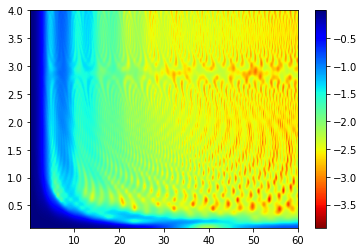

In [15]:
fig, ax = plt.subplots()
pos = ax.imshow(np.log10(1-fidelity), origin='lower', cmap='jet_r', aspect='auto',
                extent=[tf_vec[0], tf_vec[-1], Gamma_vec[0], Gamma_vec[-1]], interpolation='quadric')
cbar = fig.colorbar(pos, ax=ax)